In [5]:
import pandas as pd
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from os.path import join
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier


In [6]:
with open(join('data', 'risco_credito.pkl'), 'rb') as f:
    X_credito, y_credito = pickle.load(f)

In [7]:
X_credito, y_credito

(array([[2, 0, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 2],
        [1, 1, 1, 2],
        [1, 1, 0, 2],
        [2, 1, 1, 0],
        [2, 1, 0, 2],
        [0, 1, 1, 2],
        [0, 0, 0, 2],
        [0, 0, 1, 0],
        [0, 0, 1, 1],
        [0, 0, 1, 2],
        [2, 0, 1, 1]], dtype=object),
 array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
        'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
       dtype=object))

In [9]:
arvore = DecisionTreeClassifier(criterion='entropy')
arvore.fit(X_credito, y_credito);

In [10]:
arvore.feature_importances_

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

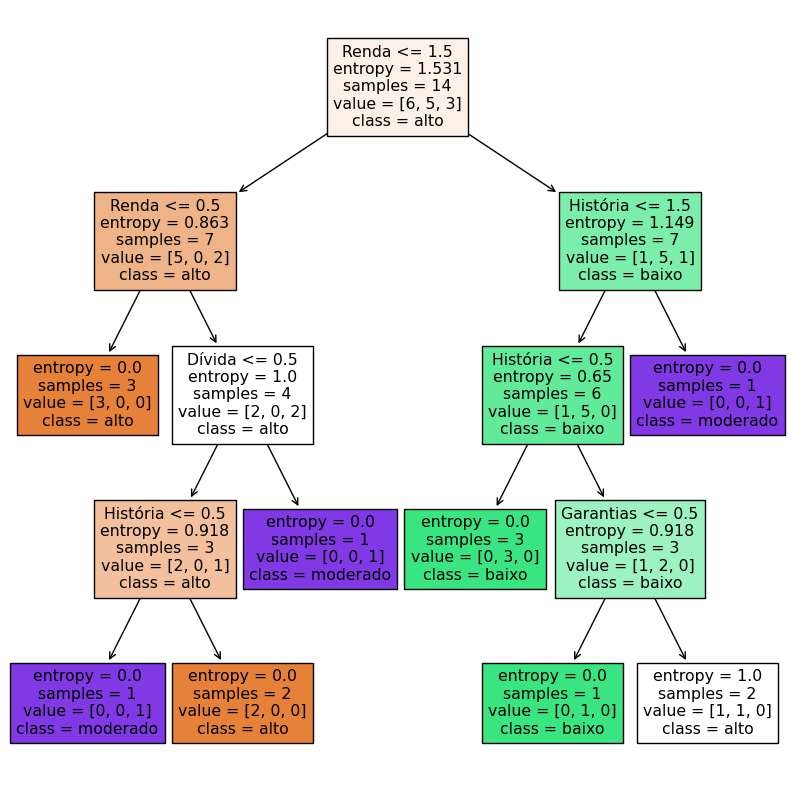

In [18]:
from sklearn import tree
import matplotlib.pyplot as plt

previsores = ['História', 'Dívida', 'Garantias', 'Renda']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore, feature_names=previsores, class_names=arvore.classes_, filled=True);

In [19]:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2) => Esperado 'baixo'
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0) => Esperado 'alto'
previsao = arvore.predict([[0,0,1,2], [2,0,0,0]])
previsao

array(['baixo', 'alto'], dtype=object)